# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 4</font>

## Exercícios 

Hora de praticar um pouco. Resolva as questões a seguir e consulte a documentação Python se necessário! 

A solução será apresentada no próximo capítulo.

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.4.3
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.20.3
pandas    : 1.3.4



In [3]:
# O dataset contém registros de corridas de táxi
df = pd.read_csv('dados/dataframe.csv', parse_dates = ['Data'], usecols = list(range(0,6)))
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [6]:
df.sort_index()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459
78,2015-12-26,5.20,NaN,NaN,NaN,NaN
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037


In [7]:
df.sort_index(inplace = True)
df.sample(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
14,2015-08-16,0.65,NaN,NaN,NaN,NaN
29,2015-09-02,2.00,NaN,NaN,NaN,NaN
21,2015-08-22,1.37,0:09:05,545.0,9.083333,6.630170
46,2015-10-14,1.37,0:09:05,545.0,9.083333,6.630170
80,2016-01-01,26.20,4:20:43,15643.0,260.716667,9.951018
70,2015-12-15,6.50,0:58:43,3523.0,58.716667,9.033333
20,2015-08-21,1.37,0:09:24,564.0,9.400000,6.861314
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
36,2015-09-17,1.50,0:11:06,666.0,11.100000,7.400000
9,2015-08-12,1.42,0:10:35,635.0,10.583333,7.453052


In [8]:
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [11]:
# Exercício 1 - Qual o valor máximo da coluna Minutos?
df.Minutos.max()
#df.nlargest(1, "Minutos") # outra forma mas retorna toda a linha(n linhas solicitadas)

260.71666666666664

In [41]:
# Exercício 2 - Qual o valor mínimo de distância acima de 2.0?

#df.Distancia[df.Distancia > 2].min()
df[df['Distancia'] > 2]['Distancia'].min()


2.01

<AxesSubplot:title={'center':'Distância acumulada'}, ylabel='Frequency'>

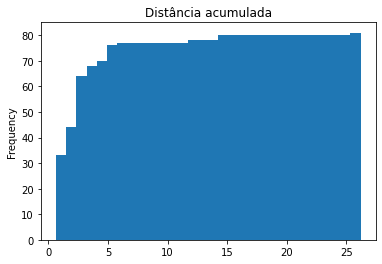

In [69]:
# Exercício 3 - Crie um plot com a frequência acumulada da coluna Distancia.

#df['distance'] = [sum(df[distance]) for i in range(1,len(df['Distancia'])-1)]
freq_acumulada = np.cumsum(df['Distancia'])

df['Distancia'].plot(kind='hist',
              title = "Distância acumulada", bins=30, cumulative = True)


In [151]:
# Exercício 4 - Qual o dia da semana no índice de posição zero?
#df.Data[0].strftime("%A")
df.Data.loc[0].dayofweek, df.Data.loc[0].day_name() # dayofweek() 0 start on monday and 6 finish on saunday

(6, 'Sunday')

In [131]:
# Exercício 5 - Qual o dia da semana nos índices nas 5 primeiras posições?
df.Data.map(lambda x: x.day_name())[:5]
#[(i, i.day_name()) for i in df.Data.loc[range(5)]]

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [4]:
# Exercício 6 - Extraia todos os dias da semana (em formato texto) e insira em uma nova coluna no dataframe df.
df['DayofWeek'] =  [ i.day_name() for i in df.Data.loc[range(len(df.Data))]]


In [158]:
df.head()
df.tail()

,Data,Distancia,Segundos,Minutos,Min_Por_Km,DayofWeek
76,2015-12-24,3.05,1508.0,25.133333,8.240437,Thursday
77,2015-12-25,14.80,8400.0,140.000000,9.459459,Friday
78,2015-12-26,5.20,NaN,NaN,NaN,Saturday
79,2015-12-30,3.15,1330.0,22.166667,7.037037,Wednesday
80,2016-01-01,26.20,15643.0,260.716667,9.951018,Friday


<AxesSubplot:xlabel='DayofWeek'>

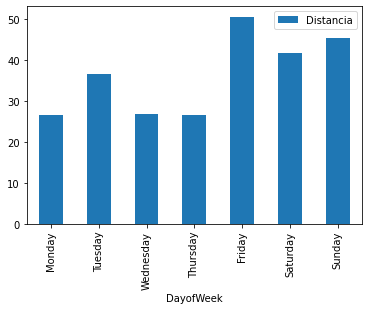

In [5]:
# Exercício 7 - Crie um gráfico de barras com o total da distância percorrida em cada dia da semana.
dayofweek = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'] # dias da semana referência
df['DayofWeek']= pd.Categorical(df['DayofWeek'], categories=dayofweek, ordered=True) # convert column values to ordered categoricals, so it is possible to use sort_values
#df[['Distancia', 'teste']].groupby('teste').sum().sort_values('teste')# plot(kind='bar')

df[['Distancia', 'DayofWeek']].groupby('DayofWeek').sum().sort_values('DayofWeek').plot(kind='bar')

Data          datetime64[ns]
Distancia            float64
Segundos             float64
Minutos              float64
Min_Por_Km           float64
DayofWeek           category
dtype: object

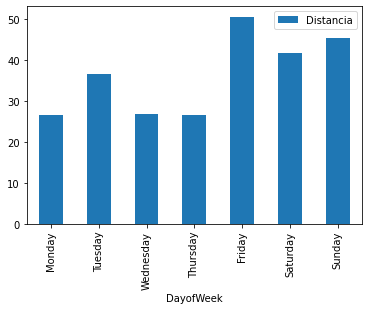

In [190]:
#por ter definido a coluna DayofWeek como categorical nem precisa do sort_values para rearranjar a coluna, ela já faz sozinha???
df[['Distancia', 'DayofWeek']].groupby('DayofWeek').sum().plot(kind='bar')
df.dtypes

In [10]:
# Exercício 8 - Delete a coluna Tempo do dataframe df.
del df['Tempo']
df.head()

,Data,Distancia,Segundos,Minutos,Min_Por_Km,DayofWeek
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday


In [6]:
# Exercício 9 - Qual o total de corridas de taxi por dia da semana?
df.groupby('DayofWeek').size()
#df.head()
#df[df.Distancia > 0]

DayofWeek
Monday       11
Tuesday      14
Wednesday    11
Thursday      8
Friday        8
Saturday     15
Sunday       14
dtype: int64

In [207]:
# Exercício 10 - Qual a média para cada uma das colunas por dia da semana?

#df.groupby('DayofWeek').agg({'Distancia':'mean', 'Segundos':'mean', 'Minutos':'mean', 'Min_Por_Km':'mean'})
df.groupby('DayofWeek').mean()

,Distancia,Segundos,Minutos,Min_Por_Km
DayofWeek,,,,
Monday,2.422727,1185.750000,19.762500,7.463840
Tuesday,2.607143,1334.600000,22.243333,7.463291
Wednesday,2.428182,1306.250000,21.770833,7.659706
Thursday,3.315000,1681.285714,28.021429,7.829348
Friday,6.315000,5071.800000,84.530000,8.039543
Saturday,2.786000,1458.500000,24.308333,7.747657
Sunday,3.246429,2802.500000,46.708333,8.184961


In [15]:
df.groupby('DayofWeek').get_group('Friday')

,Data,Distancia,Segundos,Minutos,Min_Por_Km,DayofWeek
4,2015-08-07,2.30,NaN,NaN,NaN,Friday
11,2015-08-14,0.90,376.0,6.266667,6.962963,Friday
12,2015-08-14,0.90,376.0,6.266667,6.962963,Friday
20,2015-08-21,1.37,564.0,9.400000,6.861314,Friday
30,2015-09-04,3.05,NaN,NaN,NaN,Friday
64,2015-11-27,1.00,NaN,NaN,NaN,Friday
77,2015-12-25,14.80,8400.0,140.000000,9.459459,Friday
80,2016-01-01,26.20,15643.0,260.716667,9.951018,Friday


In [16]:
df['Count'] = 1
df.groupby('DayofWeek').sum()

,Distancia,Segundos,Minutos,Min_Por_Km,Count
DayofWeek,,,,,
Monday,26.65,9486.0,158.100000,59.710723,11
Tuesday,36.50,13346.0,222.433333,74.632908,14
Wednesday,26.71,10450.0,174.166667,61.277645,11
Thursday,26.52,11769.0,196.150000,54.805434,8
Friday,50.52,25359.0,422.650000,40.197717,8
Saturday,41.79,11668.0,194.466667,61.981259,15
Sunday,45.45,16815.0,280.250000,49.109769,14


## FIM